In [49]:
# convert images to numpy array
import glob
from PIL import Image
import numpy as np

data_dir = 'data/data_rgb_256_128'
data_batch = 60
batchlist = sorted(glob.glob('utils/data/dataset_00000/*'), key=str.lower)
images=[]
y=[]
for batch in batchlist:
    print(batch)
    camera_list = glob.glob((batch + '/*'))
    for camera in camera_list:
        filelist = sorted(glob.glob(camera + '/*.jpg'), key=str.lower)
        print('Starting batch: ', camera)
        controls = np.load(camera + '/controls.npy')
        
        for i in range(len(filelist)):
            X = np.array(Image.open(filelist[i]).crop((0,50,1280,690)).resize((256,128),Image.ANTIALIAS))
            images.append(X)
            y.append(controls[i,0])

            if len(images)==5000:
                X=np.array(images)
                print('Shape for the batch: ', X.shape)
                np.save(data_dir + '/input_image_{:0>5d}.npy'.format(data_batch), X)
                np.save(data_dir + '/controls_{:0>5d}.npy'.format(data_batch), np.expand_dims(np.array(y),1))
                print('Batch ', data_batch, ' Saved!')
                data_batch += 1
                images = []
                y=[]

if len(images)!=0:
    X=np.array(images)
    print('Shape for the batch: ', X.shape)
    np.save(data_dir + '/input_image_{:0>5d}.npy'.format(data_batch), X)
    np.save(data_dir + '/controls_{:0>5d}.npy'.format(data_batch), np.expand_dims(np.array(y),1))
    print('Batch ', data_batch, ' Saved!')


In [52]:
from PIL import Image
import numpy as np
import glob

import matplotlib.pyplot as plt

from carla import image_converter as util

filelist = glob.glob('data/images/real_environment/01_nov_imx290/01_nov/*.jpg')
X=np.array(Image.open(filelist[300]).crop((0,80,1280,720)).resize((480,240),Image.ANTIALIAS))
# X=np.array(Image.open(filelist[300]).crop((0,0,1280,640)).resize((480,240),Image.ANTIALIAS))
# X=np.load('dataset_rgb_480_240_augmented/data_batch_002/camera_center/000.npy')
# X=np.array(X)*20
print(X.shape)
plt.imshow(X)
plt.show()

In [48]:
# convert real images to numpy array
import glob
from PIL import Image
import numpy as np

data_dir = 'data/numpy/real_256_128'
data_batch = 32
filelist = sorted(glob.glob('data/images/real_environment/12_oct_imx290_day/12_oct/*.jpg'), key=str.lower)
images=[]
y=[]
controls=np.load('data/images/real_environment/12_oct_imx290_day/12_oct/control.npy')
print(controls.shape)
for i in range(0,len(filelist)):
    if i%500==0:
        print(i)
    X = np.array(Image.open(filelist[i]).crop((0,80,1280,720)).resize((256,128),Image.ANTIALIAS))
    images.append(X)
    y.append(controls[i])

    if len(images)==5000:
        X=np.array(images)
        print('Shape for the batch: ', X.shape)
        np.save(data_dir + '/input_image_{:0>5d}.npy'.format(data_batch), X)
        np.save(data_dir + '/controls_{:0>5d}.npy'.format(data_batch), np.array(y))
        print('Batch ', data_batch, ' Saved!')
        data_batch += 1
        images = []
        y=[]

if len(images)!=0:
    X=np.array(images)
    print('Shape for the batch: ', X.shape)
    np.save(data_dir + '/input_image_{:0>5d}.npy'.format(data_batch), X)
    np.save(data_dir + '/controls_{:0>5d}.npy'.format(data_batch), np.array(y))
    print('Batch ', data_batch, ' Saved!')



In [47]:
# save controls
import numpy as np
import glob 

files=sorted(glob.glob('data/images/real_environment/12_oct_imx290_day/*.csv'), key=str.lower)
control=None

for file in files:
    print(file)
    y = np.genfromtxt(file,delimiter=',')
    print(y.shape)
    y[:,0] = y[:,0]* 42/50400 # 42/ 70 / 720
    if control is None:
        control=y
    else:
        control=np.append(control,y,axis=0)
    
#     y=np.expand_dims(y,1)
#     np.save(file,y)
    print(np.min(y[:,0]),np.max(y[:,0]))

print(np.min(control[:,0]),np.max(control[:,0]))
print(control.shape)
np.save('data/images/real_environment/12_oct_imx290_day/12_oct/control.npy',control)
print('Done')
    

In [2]:
import numpy as np
import glob

ys=glob.glob('data/numpy/simulator_256_128/cont*')

np.set_printoptions(precision=5, suppress=True)
for n in ys:
    y = np.load(n).astype(np.float32)
#     y[:,0]=y[:,0]*70
    np.save(n,y)
    print(np.min(y[:,0]),np.max(y[:,0]))


    

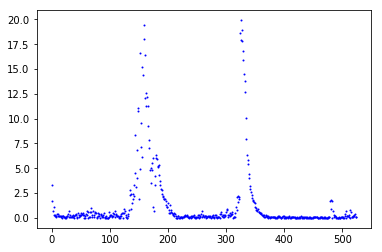

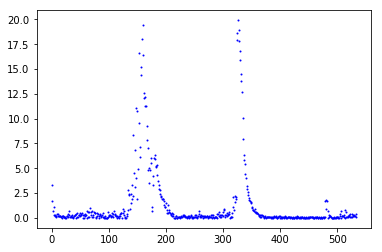

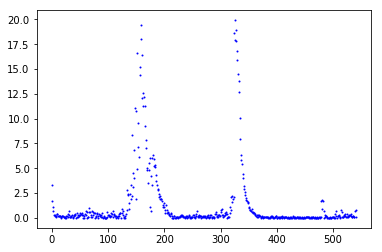

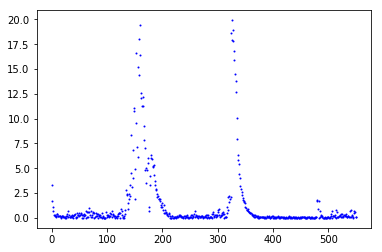

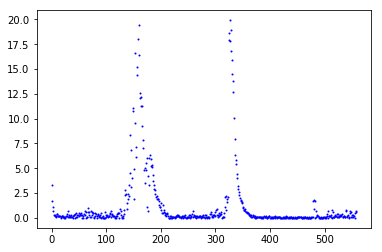

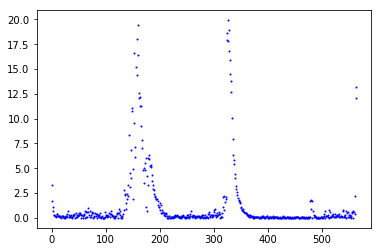

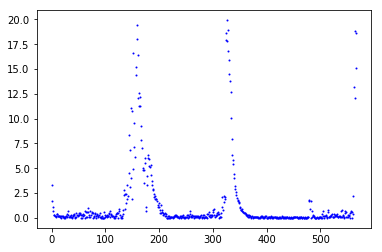

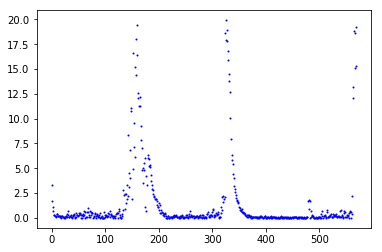

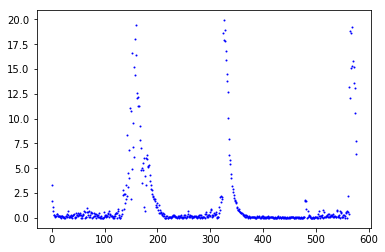

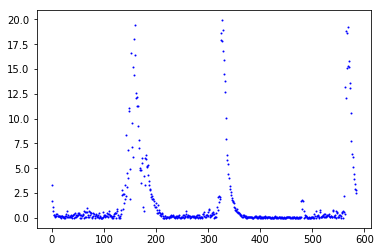

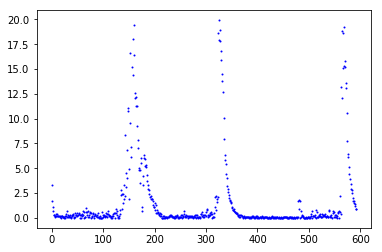

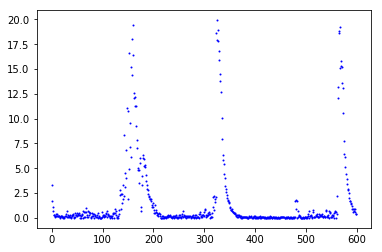

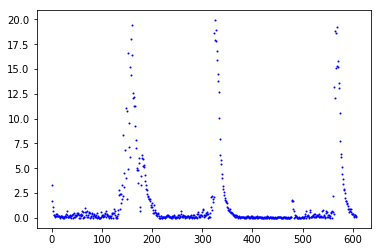

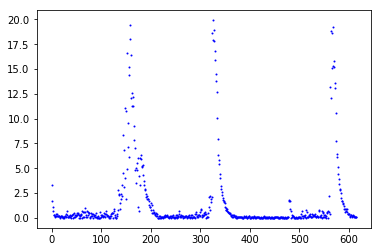

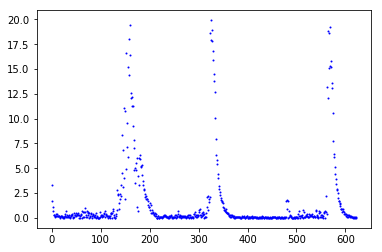

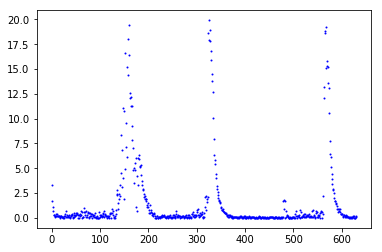

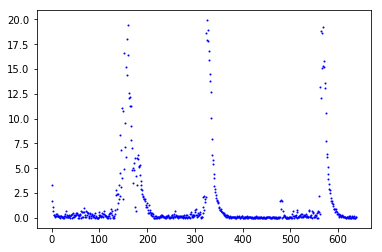

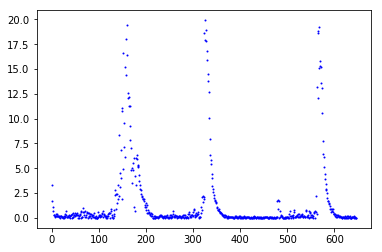

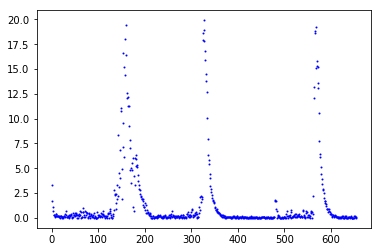

KeyboardInterrupt: 

In [22]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

plt.ion()

for i in range(100):
    loss= np.load('loss_history_online_training.npy')
    loss=loss[loss<20]
    plt.plot(range(loss.shape[0]),loss,'bo',ms=1)
    plt.show()
    time.sleep(1)

NameError: name 'animation' is not defined

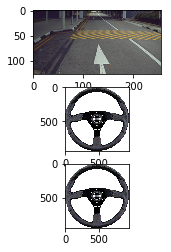

In [ ]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

X=np.load('data/numpy/real_256_128/input_image_00000.npy')
y=np.genfromtxt('diff_steering.csv',delimiter=',')
wheel = Image.open('steering_wheel.png')

def update_image(i):

    data = X[i]
    actual = ndimage.rotate(wheel, y[i,0], reshape=False)
    predicted = ndimage.rotate(wheel, y[i,1], reshape=False)
    
    img.set_array(data[0])
    whl_a.set_array(actual)
    whl_p.set_array(predicted)
    return img, whl_a,whl_p

fig = plt.figure()
ax = fig.add_subplot(3, 1, 1)
img = ax.imshow(X[0], animated=True)
ax2 = fig.add_subplot(3, 1, 2)
whl_a = ax2.imshow(wheel, animated=True)
ax3 = fig.add_subplot(3, 1, 3)
whl_p = ax3.imshow(wheel, animated=True)
ani = animation.FuncAnimation(fig, update_image, interval=1, blit=True)
